# **Project Everest Report - Jakub Bartnik**

Author: Jakub Bartnik

## GitHub URL 

https://github.com/jakubbartnik/UCDPA_jakubbartnik

##Abstract 

This review contains the summary about impact of introducing new safety gear for climbing versus expedition survival that climbed in area of Hymalaya Nepal within last 100 years. Implememntation process is splited between four parts: Setting goeals, data preparation, data exploration, analisis. The review will explain how all that was done by myself and what conclusion I made from results. Report content can be found in python notebook including the code so it is easier to follow steps.
There is another python notebook in repository demonstrating simple webscrapping. File name is Web_scrapping_quotes.ipynb.

##Introduction

I decided upon this topic as climbing is, quite simply, my passion. As this is my first Data Science Project I felt that I should choose a topic that I am familiar with.
The aim of this research is to ascertain if, after the introduction of safety equipment such as steel carabiners (1910) or dynamic rope and harness (1964), there has been any improvement in Nepal Himalaya area climber's survival rates. My research is based on a Mount Everest dataset that tracks all expeditions that climbed in area of Nepal Himalaya from 1905 to 2019.
The last point is how many helpers should expedition hire in order to be successfull. This will be predicted based on only sucessfull expeditions considering number of members and hired staff data using ML. 

##Dataset

The Himalayan Database is a compilation of records for all expeditions that have climbed in the Nepal Himalaya. The database is based on the expedition archives of Elizabeth Hawley, a longtime journalist based in Kathmandu, and it is supplemented by information gathered from books, alpine journals and correspondence with Himalayan climbers.
The data cover all expeditions from 1905 through Spring 2019 to more than 465 significant peaks in Nepal. Also included are expeditions to both sides of border peaks such as Everest, Cho Oyu, Makalu and Kangchenjunga as well as to some smaller border peaks. Data on expeditions to trekking peaks are included for early attempts, first ascents and major accidents.




##Implementation Process

###Setting goals
I like to split my main goal from introduction into smaller chunks that will be easier to archive and at the same time makes this review more structured and hopefully readable. 
 - Goal 1 is to check impact of first climbing carabineer on expedition survival rate. Carabiner was developed in 1910. Therefore I am going to split all dataframe into two sets and compare the falls.

- Goal 2 is about introduction of dynamic rope and harness in 1960’s. I am going to split all data and compare periods with and without it.

- Goal 3 is to figure out  how many helpers(hired_staff) should expedition hire in order to be successfull. Result should be done in precentage. 

###Data preparation
I started to look at the data manually prior writing this review. Those data are splited between three csv files and I belive for my pourpose I want to merge them all in one file. I going to import all libraries in first code box and keep updating it based on functions I want to use later in the code. This hopefully makes a sense later where I dont have to look over all code boxes in python notebook and run each one of them in case of missing one library.

In [ ]:
#installing Pinguin package
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=f00a5631452c70e70adce1f4c45853d684dc7646a5ad0204a6b3e3fba097b153
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils


In [ ]:
#installing myst_nb package
!pip install myst_nb

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import pingouin as pg
from dataclasses import replace
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from myst_nb import glue
from sklearn.neighbors import KNeighborsClassifier 

Reading data from all three csv (expeditions.csv, peaks.csv, members.csv). I am using commands like .shape and .info. Those commands showing me column names and few records for examination but at the same time it gives me number of records. Thanks to that I know that expeditions dataframe is 10364 rows and 16 columns, peak.csv is 467 rows and 8 columns and members.csv is 76519 rows and 21 columns.

In [ ]:
#importing everest data 
df_exp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/everest_data/expeditions.csv')
df_peaks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/everest_data/peaks.csv')
df_mem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/everest_data/members.csv')

#basic overview on data
print('shape of expeditions - ', df_exp.shape)
print('shape of peaks - ', df_peaks.shape)
print('shape of members - ', df_mem.shape)


shape of expeditions -  (10364, 16)
shape of peaks -  (468, 8)
shape of members -  (76519, 21)


 I am exploring all csv one by one using .head() which shows me five first rows to identify best column I can merge with another dataframe.

In [ ]:
df_exp.head()

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,True,NaN
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),7937.0,10,0,0,0,False,NaN
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaN,Success (main peak),7937.0,6,0,8,0,False,NaN
3,ANN278301,ANN2,Annapurna II,1978,Autumn,1978-09-08,1978-10-02,1978-10-05,"Bad weather (storms, high winds)",7000.0,2,0,0,0,False,NaN
4,ANN279301,ANN2,Annapurna II,1979,Autumn,NaN,1979-10-18,1979-10-20,"Bad weather (storms, high winds)",7160.0,3,0,0,0,False,NaN


In [ ]:
df_peaks.head()

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,NaN,5630,Climbed,1953.0,UK,AMPG53101
2,ANN1,Annapurna I,NaN,8091,Climbed,1950.0,France,ANN150101
3,ANN2,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
4,ANN3,Annapurna III,NaN,7555,Climbed,1961.0,India,ANN361101


In [ ]:
df_mem.head()

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Leader,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Exp Doctor,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN


This is how I identified column ‘peak_id’ to merge expeditions.csv with peak.csv and assigned it to ‘df1’ as temporary dataframe.

In [ ]:
df1 =df_exp.merge(df_peaks ,on ='peak_id') 
print(df1.shape) 
df1.head()

(10363, 23)


,expedition_id,peak_id,peak_name_x,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,...,hired_staff_deaths,oxygen_used,trekking_agency,peak_name_y,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,0,True,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),7937.0,...,0,False,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaN,Success (main peak),7937.0,...,0,False,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
3,ANN278301,ANN2,Annapurna II,1978,Autumn,1978-09-08,1978-10-02,1978-10-05,"Bad weather (storms, high winds)",7000.0,...,0,False,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
4,ANN279301,ANN2,Annapurna II,1979,Autumn,NaN,1979-10-18,1979-10-20,"Bad weather (storms, high winds)",7160.0,...,0,False,NaN,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101


Next I done the same with my temporary dataframe and members.csv based on ‘expedition_id’ and assigned it to dataframe -’df’. I did used .merge command to combine all three csv’s.

In [ ]:
df = df1.merge(df_mem ,on ='expedition_id') 
print(df.shape) 
df.head()

(76511, 43)


,expedition_id,peak_id_x,peak_name_x,year_x,season_x,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres_x,...,highpoint_metres_y,success,solo,oxygen_used_y,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,7937.0,True,False,True,False,NaN,NaN,False,NaN,NaN
2,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,7250.0,False,False,False,False,NaN,NaN,False,NaN,NaN
3,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,7250.0,False,False,False,False,NaN,NaN,False,NaN,NaN
4,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,...,7937.0,True,False,True,False,NaN,NaN,False,NaN,NaN


At this point I started looking for empty values in my current dataframe – ‘df’. I am using .isna() function to show all ‘nan’ values. Because I find the column that will make significant impact on my results I want to take closer look at column ‘death_cause’. That is why I am using df[‘death_cause’].unique() function.

In [ ]:
print(df.isna().sum().sort_values())

expedition_id                     0
peak_name                         0
peak_id_y                         0
member_id                         0
climbing_status                   0
height_metres                     0
hired                             0
peak_name_y                       0
success                           0
oxygen_used_x                     0
year_y                            0
hired_staff                       0
hired_staff_deaths                0
members                           0
solo                              0
termination_reason                0
oxygen_used_y                     0
died                              0
injured                           0
season_x                          0
year_x                            0
peak_name_x                       0
peak_id_x                         0
member_deaths                     0
season_y                          0
sex                               2
citizenship                      10
expedition_role             

In [ ]:
#printing unique values
print(df['death_cause'].unique())

[nan 'Fall' 'Exposure / frostbite' 'Avalanche' 'AMS' 'Unknown'
 'Illness (non-AMS)' 'Falling rock / ice' 'Exhaustion' 'Other'
 'Disappearance (unexplained)' 'Crevasse' 'Icefall collapse']


Thanks to that I see that value ‘Other’ is not really make more sense then ‘nan’ or ‘unknown’ but it generate more noise so I am replacing all ‘Other’ with ‘nan’. 

In [ ]:
#replacing missleading value
df['death_cause'] = df.death_cause.replace(['Other'], [np.nan])
#verifying that "Other" has been replaced with nan
print(df['death_cause'].unique())

[nan 'Fall' 'Exposure / frostbite' 'Avalanche' 'AMS' 'Unknown'
 'Illness (non-AMS)' 'Falling rock / ice' 'Exhaustion'
 'Disappearance (unexplained)' 'Crevasse' 'Icefall collapse']


To limit variables in current dataset that are mainly repeated like year_x and year_y I will drop some of the columns that came after merging. Important columns from expedition.csv is ‘termination_reason’ and ‘expedition_id’, ‘year’. Important columns from peaks.csv is ‘peak_name’ and ‘climbing_status’. Important columns from members.csv is ‘death_cause’.Those I belive are important columns I want to keep. I will drop  the following columns that are not important:  'trekking_agency', 'peak_alternative_name', 'sex', 'expedition_role', 'injury_type', 'injury_height_metres', 'oxygen_used_x', 'age', 'first_ascent_country', 'hired', 'success', 'member_id', 'highpoint_metres_y', 'oxygen_used_y', 'died', 'death_height_metres', 'injured', 'citizenship', 'solo', 'year_y', 'season_y', 'peak_name_y', 'peak_name_x', 'peak_id_y', 'peak_id_x', 'season_x', 'climbing_status', 'first_ascent_expedition_id'. Result of dataframe without dropped columns was saved to temporary dataframe ‘cleaning’  

In [ ]:
#droping non-inportant columns
cleaning = df.drop(columns=['trekking_agency', 'peak_alternative_name', 'sex', 'expedition_role', 'injury_type', 'injury_height_metres', 'oxygen_used_x', 'age', 'first_ascent_country', 'hired', 'success', 'member_id', 'highpoint_metres_y', 'oxygen_used_y', 'died', 'death_height_metres', 'injured', 'citizenship', 'solo', 'year_y', 'season_y', 'peak_name_y', 'peak_name_x', 'peak_id_y', 'peak_id_x', 'season_x', 'climbing_status', 'first_ascent_expedition_id'])

In [ ]:
cleaning.head()

,expedition_id,year_x,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres_x,members,member_deaths,hired_staff,hired_staff_deaths,height_metres,first_ascent_year,peak_name,death_cause
0,ANN260101,1960,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,7937,1960.0,Annapurna II,NaN
1,ANN260101,1960,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,7937,1960.0,Annapurna II,NaN
2,ANN260101,1960,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,7937,1960.0,Annapurna II,NaN
3,ANN260101,1960,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,7937,1960.0,Annapurna II,NaN
4,ANN260101,1960,1960-03-15,1960-05-17,NaN,Success (main peak),7937.0,10,0,9,0,7937,1960.0,Annapurna II,NaN


Dropped columns did not stopped me to find duplicates in this dataframe but as this review is about expeditions there was no need to have all members listedwhere most of the values were repeated per expedition. Right now i will be able to find all duplicates that can be dropped and makes more sense for this review. I done that based on field ‘expedition_id’. I sorted values and finally dropped it and result saved to ‘exp_dup’. 

In [ ]:
#finding duplicates
duplicates = cleaning.duplicated(subset='expedition_id', keep=False)

#sorting duplicates
duplicated_expedition = cleaning[duplicates].sort_values(by ='expedition_id') 

# printing relevant columns of duplicated_expedition
print(duplicated_expedition[['expedition_id']]) 

      expedition_id
75903     ACHN15301
75902     ACHN15301
75906     ACHN15301
75905     ACHN15301
75904     ACHN15301
...             ...
74525     YAUP17101
74515     YAUP89301
74516     YAUP89301
74517     YAUP89301
74518     YAUP89301

[75741 rows x 1 columns]


In [ ]:
# Drop complete duplicates from cleaning 
exp_dup = cleaning.drop_duplicates()

#printing relevant columns of duplicated
print(exp_dup[['expedition_id']])

      expedition_id
0         ANN260101
19        ANN269301
29        ANN273101
35        ANN278301
37        ANN279301
...             ...
76478     NUPL18301
76490     TILK18301
76495     YARA18301
76498     GYLZ19101
76508     SANK19101

[11052 rows x 1 columns]


Stripping down string from expedition_id using simple regex.

In [ ]:
#removing strings from expedition_id using regex
exp_dup['expedition_id'].replace(to_replace=r'([a-zA-Z]+)', value='', regex=True)

0        260101
19       269301
29       273101
35       278301
37       279301
          ...  
76478     18301
76490     18301
76495     18301
76498     19101
76508     19101
Name: expedition_id, Length: 11052, dtype: object

Cleaned data I saved to new file clean_everest.csv to avoid running all code boxes in python notebook. 

In [ ]:
#saving current content to a file 
exp_dup.to_csv("/content/drive/MyDrive/Colab Notebooks/everest_data/clean_everest.csv")

###Data exploration
Cleaned data saved as result of cleaning are loaded as ‘dfc’.   

In [ ]:
dfc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/everest_data/clean_everest.csv")
print(dfc.columns)

Index(['Unnamed: 0', 'expedition_id', 'year_x', 'basecamp_date',
       'highpoint_date', 'termination_date', 'termination_reason',
       'highpoint_metres_x', 'members', 'member_deaths', 'hired_staff',
       'hired_staff_deaths', 'height_metres', 'first_ascent_year', 'peak_name',
       'death_cause'],
      dtype='object')


Features termination_reson and death_cause are nominal i need to convert it to dummy variables. I am doing it using dataframe option ‘.get_dummies’. 

In [ ]:
pd.get_dummies(dfc, columns=['death_cause', 'termination_reason'])

,Unnamed: 0,expedition_id,year_x,basecamp_date,highpoint_date,termination_date,highpoint_metres_x,members,member_deaths,hired_staff,...,termination_reason_Did not reach base camp,"termination_reason_Illness, AMS, exhaustion, or frostbite",termination_reason_Lack (or loss) of supplies or equipment,termination_reason_Lack of time,termination_reason_Other,"termination_reason_Route technically too difficult, lack of experience, strength, or motivation",termination_reason_Success (claimed),termination_reason_Success (main peak),termination_reason_Success (subpeak),termination_reason_Unknown
0,0,ANN260101,1960,1960-03-15,1960-05-17,NaN,7937.0,10,0,9,...,0,0,0,0,0,0,0,1,0,0
1,19,ANN269301,1969,1969-09-25,1969-10-22,1969-10-26,7937.0,10,0,0,...,0,0,0,0,0,0,0,1,0,0
2,29,ANN273101,1973,1973-03-16,1973-05-06,NaN,7937.0,6,0,8,...,0,0,0,0,0,0,0,1,0,0
3,35,ANN278301,1978,1978-09-08,1978-10-02,1978-10-05,7000.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,ANN279301,1979,NaN,1979-10-18,1979-10-20,7160.0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11047,76478,NUPL18301,2018,2018-10-28,2018-11-02,2018-11-03,6861.0,7,0,5,...,0,0,0,0,0,0,0,1,0,0
11048,76490,TILK18301,2018,2018-10-06,2018-10-15,2018-10-20,6369.0,5,0,0,...,0,0,0,0,0,0,0,1,0,0
11049,76495,YARA18301,2018,2018-09-10,2018-10-10,NaN,5900.0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
11050,76498,GYLZ19101,2019,2019-04-03,2019-04-09,2019-04-12,6151.0,6,0,4,...,0,0,0,0,0,0,0,1,0,0


To  get feeling an overview current dataset I want to show overall procentage of reasons to die in Himalaya based on all 114 years of experience. I am not really curius about exact procentage value but more generic representaion. I am going to represent this using pie chart. 

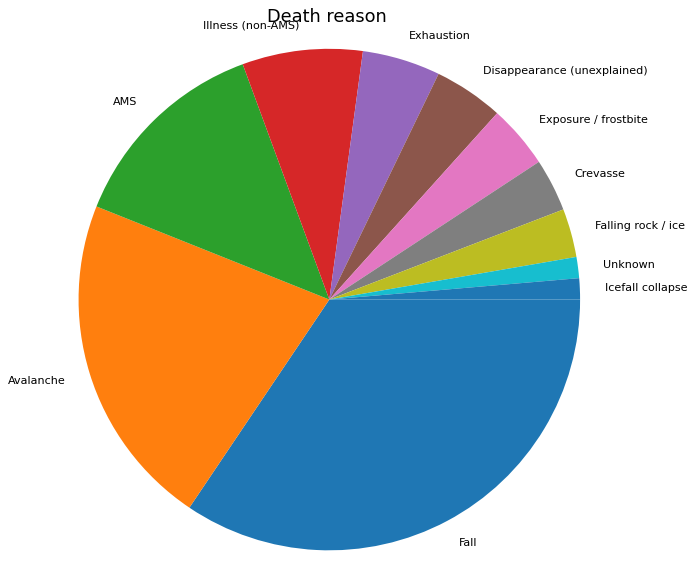

In [ ]:
reason = dfc['death_cause']
sum_reason = reason.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('Death reason', fontsize=16)
plt.show()

Graph 1. Death reason based on 114 years dataframe.



Avalanches, AMS(Alternated Mind status - caused by trauma or intoxication) and Illnes are the main reasons for death after falling. The same chart and same period of time just on termination reason for expeditions. 

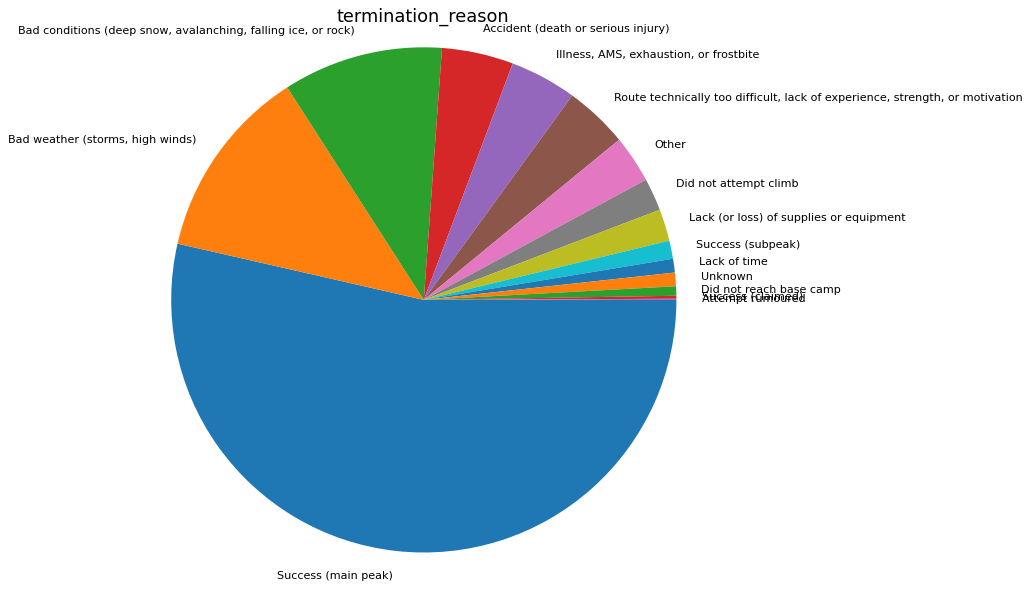

In [ ]:
termination=dfc['termination_reason']
sum_reason = termination.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('termination_reason', fontsize=16)
plt.show()

Graph 2. Termination reason based on 114 years data

This column will get useful further in this paper when I will try to narrow down ‘goal 3’.

Getting back to our goals and split data for goal 1 which is before 1910 assign it to dataframe ‘before1910’ and after 1911 assigned to ‘after1910’ . For goal 2 I will split from 1905 to 1960 and assigned to ‘no_harness_rope’ and from 1961 to 2019 assigned to ‘yes_harnes_rope’

In [ ]:
#spliting dfc for goal 1.
before1910 = dfc[dfc['year_x'] < 1910]
after1910 = dfc[dfc['year_x'] > 1911]

#spliting dfc for goal 2.
no_harness_rope = dfc[dfc['year_x'] < 1960]
yes_harness_rope = dfc[dfc['year_x'] > 1961]


Before in the cleaning part there were columnes dropped as non-important for this review. At the moment as I am thinking to build predictive model I want to drop another column called 'peak_name' as its not numerical. 

In [ ]:
before1910 = before1910.drop(columns=['peak_name'])
after1910 = after1910.drop(columns=['peak_name'])
no_harness_rope = no_harness_rope.drop(columns=['peak_name'])
yes_harness_rope = yes_harness_rope.drop(columns=['peak_name'])

I want to keep exploring to find at least "apparent effect" that reasons are changing within the years.

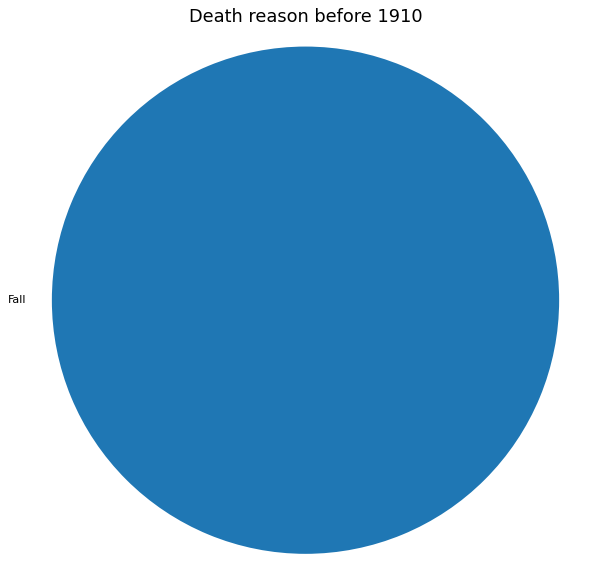

In [ ]:
reason_before1910 = before1910['death_cause']
sum_reason = reason_before1910.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('Death reason before 1910', fontsize=16)
plt.show()

Graph 3: Death reason before 1910

The result is actually schocking it appear that falling was the only reason to die in high montains before 1910. Other reasons like frostbite, ilness or avalanche was not the case in this years. However while looking at amount of records used for this graph its obvious that there was not enough observations.

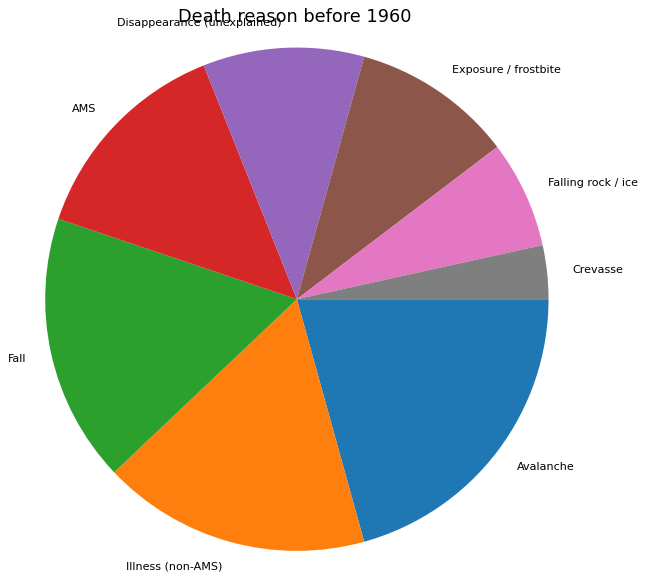

In [ ]:
reason_no_harness_rope = no_harness_rope['death_cause']
sum_reason = reason_no_harness_rope.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('Death reason before 1960', fontsize=16)
plt.show()

Graph 4: Death reason before 1960

Pie chart for data before 1960 indicate that avalanche and ilness was the biggest reasons to die and falling going into third place. 

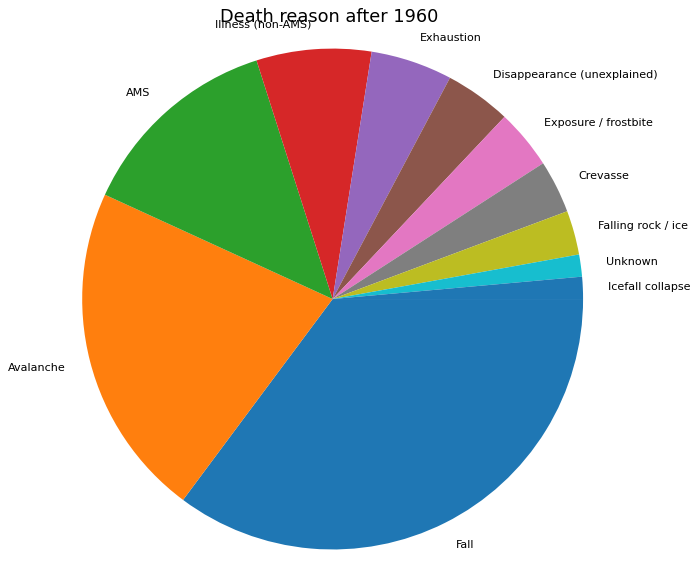

In [ ]:
reason_yes_harness_rope = yes_harness_rope['death_cause']
sum_reason = reason_yes_harness_rope.value_counts()
plt.figure(figsize=(9,9), dpi=80)
plt.pie(sum_reason, labels=sum_reason.index.tolist(), counterclock=False, startangle=0)
plt.axis('equal')
plt.title('Death reason after 1960', fontsize=16)
plt.show()

Graph 5: Death reason after 1960

Graphs 5 and 1 are very similar but graphs 3 and 4 indicating that resons were changing along the years . 

In [ ]:
dfc.dtypes

Unnamed: 0              int64
expedition_id          object
year_x                  int64
basecamp_date          object
highpoint_date         object
termination_date       object
termination_reason     object
highpoint_metres_x    float64
members                 int64
member_deaths           int64
hired_staff             int64
hired_staff_deaths      int64
height_metres           int64
first_ascent_year     float64
peak_name              object
death_cause            object
dtype: object

In [ ]:
#Analysing distribution on the depandant column
dfc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11052.0,37612.869888,22925.889055,0.0,17692.0,35106.0,59000.25,76508.0
year_x,11052.0,2000.704126,14.979268,1905.0,1993.0,2005.0,2012.00,2019.0
highpoint_metres_x,10639.0,7427.878748,1014.528513,3500.0,6707.0,7350.0,8188.00,8850.0
members,11052.0,6.231904,5.760997,0.0,2.0,5.0,8.00,99.0
member_deaths,11052.0,0.142689,0.501917,0.0,0.0,0.0,0.00,10.0
hired_staff,11052.0,3.023887,5.752706,0.0,0.0,1.0,4.00,99.0
hired_staff_deaths,11052.0,0.057637,0.372365,0.0,0.0,0.0,0.00,11.0
height_metres,11052.0,7827.043612,840.296724,5407.0,7074.0,8163.0,8516.00,8850.0
first_ascent_year,10925.0,1960.335378,27.126778,201.0,1953.0,1956.0,1961.00,2019.0


###Analisys

We have to move to goal 2 as data are more sufficient compares to goal 1. The only way it can be analyzed is to use grouping method. Groping it into categories it should be possible to measure percentage or frequency. Will try to apply hypothesis testing which is method of statistical inference. I am going to carry this analysis using Chi -squared. Refering to *goal 2*,

Zero hypothesis is that climbing has became much saver after development of dynamic rope and harness which translates to probability of falling and die is less then  50%. This hypothesis will be marked as H0 and tried to be proved as correct. 

 H0 = (.50, .50)


Creating function that will save yes and no for falls in separate feature.

In [ ]:
#creating categorise function
def categorise(row):
  if row['death_cause'] == 'Fall':
    return 'yes'
  elif row['death_cause'] != 'Fall':
    return 'no' 

In [ ]:
#storing result of categorise function in new feature
dfc['falls'] = dfc.apply(lambda row: categorise(row), axis=1)

In [ ]:
#want to simplify my dataframe
dfS = dfc[['year_x', 'members', 'hired_staff', 'falls']]


In [ ]:
#split dataframe again for before and after with new column
before = dfS[dfS['year_x'] < 1960]
after = dfS[dfS['year_x'] > 1961]

In [ ]:
observed_b4 = before['falls'].value_counts()
observed_after = after['falls'].value_counts()

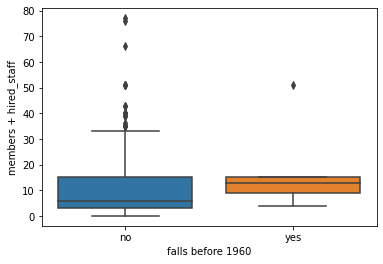

In [ ]:
fallb4 = before['falls']
crowd_b4=before['members'] + before['hired_staff']
#ploting
_ = sns.boxplot(x=fallb4, y=crowd_b4)
_ = plt.xlabel('falls before 1960')
_ = plt.ylabel('members + hired_staff')
plt.show()

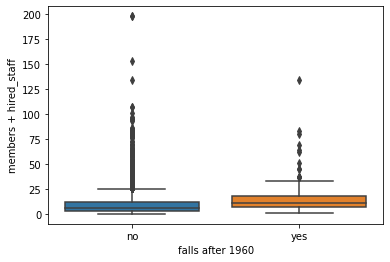

In [ ]:
fall = after['falls']
crowd_after=after['members'] + after['hired_staff']
#ploting
_ = sns.boxplot(x=fall, y=crowd_after)
_ = plt.xlabel('falls after 1960')
_ = plt.ylabel('members + hired_staff')
plt.show()

In [ ]:
crowd_b4=before['members'].sum()
crowd_after=after['members'].sum()
percent_before = (observed_b4[1]/crowd_b4)*100
percent_after = (observed_after[1]/crowd_after)*100
print('Falls before 1960 %- ', percent_before ,'Falls after 1960 %-', percent_after)

Falls before 1960 %-  0.3703703703703704 Falls after 1960 %- 0.3672971686890317


By looking at the frequenties in each set looks like amount of people that tried to reach summits in Nepal has increased about 50 times after 1960. Thats why its usefull to calculate percent from both dataset and compare it.Dictionary with my probabilities. 

In [ ]:
dict = {'yes': .50,
        'no': .50}
  
dicta = {'yes': .50,
         'no': .50}
#series from dictionary
probabilities_b = pd.Series(dict)
probabilities_a = pd.Series(dicta)

#I am spliting probabilities as there are different count of results per set

In [ ]:
#B and N is exact number of observations per set
B = 260
N = 10754
expected_b = B * probabilities_b
expected_a = N * probabilities_a
print('\n before \n', expected_b, '\n after \n', expected_a)


 before 
 yes    130.0
no     130.0
dtype: float64 
 after 
 yes    5377.0
no     5377.0
dtype: float64


In [ ]:
from scipy.stats import chisquare

chisquare(f_obs = observed_b4, f_exp = expected_b)

Power_divergenceResult(statistic=240.3846153846154, pvalue=3.242219985667723e-54)

In [ ]:
chisquare(f_obs = observed_after, f_exp = expected_a)

Power_divergenceResult(statistic=9788.692579505301, pvalue=0.0)

The numbers I got are so strange that I decided to use automated statistics using pinguin package. Instaling and import pingouin as pg. This will make dirty work for me using scipy to calculate statistics. 

In [ ]:
expected_before, observed_before, stats =pg.chi2_independence(before, x='members', y='falls')
stats

/usr/local/lib/python3.8/dist-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/usr/local/lib/python3.8/dist-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:7416: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:7416: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:7413: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,11.490993,16.0,0.778214,0.210229,0.515164
1,cressie-read,0.666667,10.610864,16.0,0.832844,0.202017,0.474687
2,log-likelihood,0.000000,11.125642,16.0,0.801664,0.206860,0.498486
3,freeman-tukey,-0.500000,NaN,16.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,16.0,0.000000,inf,NaN
5,neyman,-2.000000,NaN,16.0,NaN,NaN,NaN


In [ ]:
expected_after, observed_afterp, statsa = pg.chi2_independence(after, x='members', y='falls')
stats


/usr/local/lib/python3.8/dist-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/usr/local/lib/python3.8/dist-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:7416: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:7416: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:7413: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,11.490993,16.0,0.778214,0.210229,0.515164
1,cressie-read,0.666667,10.610864,16.0,0.832844,0.202017,0.474687
2,log-likelihood,0.000000,11.125642,16.0,0.801664,0.206860,0.498486
3,freeman-tukey,-0.500000,NaN,16.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,16.0,0.000000,inf,NaN
5,neyman,-2.000000,NaN,16.0,NaN,NaN,NaN


Goal 3. Whats the percentage of hired_staff that need to be hired for expedition to be sucessful. 

In [ ]:
goal3= dfc[['year_x', 'members', 'hired_staff', 'termination_reason']].copy()
#only  subset for sucess as a termination reason will be considered 
G3= goal3[(goal3["termination_reason"] == 'Success (main peak)')] 
#droping termination reason as not needed anymore
G3 = goal3.drop('termination_reason', axis=1)
G3

,year_x,members,hired_staff
0,1960,10,9
1,1969,10,0
2,1973,6,8
3,1978,2,0
4,1979,3,0
...,...,...,...
11047,2018,7,5
11048,2018,5,0
11049,2018,3,0
11050,2019,6,4


In [ ]:
# Using DataFrame.transform() method. I want to get percant of hired staff for amount of members
G3['percent_hired'] = round(G3['hired_staff']/G3['members']*100)
G3

,year_x,members,hired_staff,percent_hired
0,1960,10,9,90.0
1,1969,10,0,0.0
2,1973,6,8,133.0
3,1978,2,0,0.0
4,1979,3,0,0.0
...,...,...,...,...
11047,2018,7,5,71.0
11048,2018,5,0,0.0
11049,2018,3,0,0.0
11050,2019,6,4,67.0


In [ ]:
G3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_x,11052.0,2000.704126,14.979268,1905.0,1993.0,2005.0,2012.0,2019.0
members,11052.0,6.231904,5.760997,0.0,2.0,5.0,8.0,99.0
hired_staff,11052.0,3.023887,5.752706,0.0,0.0,1.0,4.0,99.0
percent_hired,11026.0,inf,NaN,0.0,0.0,33.0,83.0,inf


Data contain some inf and NaN values

In [ ]:
#this code block is to fix pandas error about infinity values I am getting in results of splitting
# Replacing infinite values data with nan
G3.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
G3.dropna(inplace=True)

In [ ]:
G3 = G3.dropna()
G3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_x,11013.0,2000.759648,14.920168,1905.0,1993.0,2005.0,2012.0,2019.0
members,11013.0,6.253973,5.759219,1.0,2.0,5.0,8.0,99.0
hired_staff,11013.0,3.026060,5.757097,0.0,0.0,1.0,4.0,99.0
percent_hired,11013.0,51.618814,65.096537,0.0,0.0,33.0,83.0,1100.0


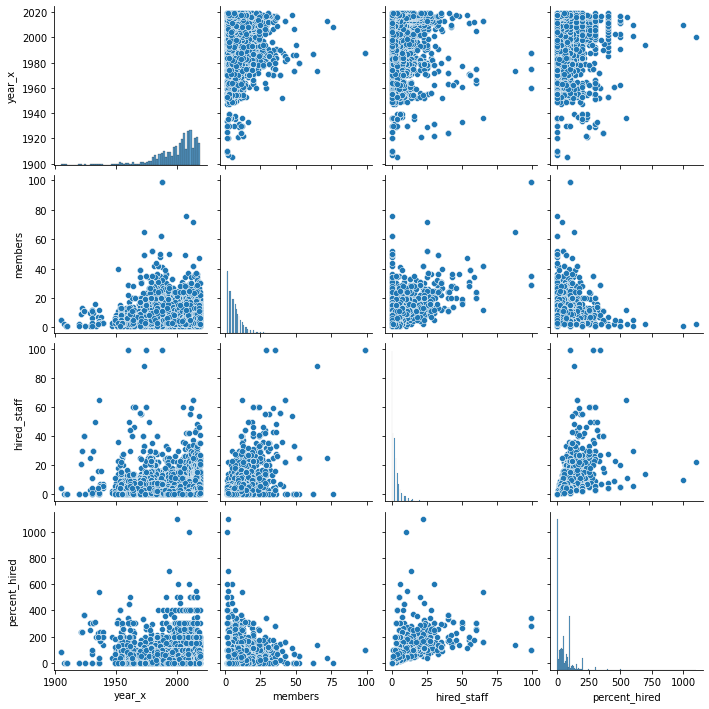

In [ ]:
# Correlation analysis using scatter matrix function
G3_at = G3.iloc[:, 0:5]
#ploting histogram
sns.pairplot(G3_at)

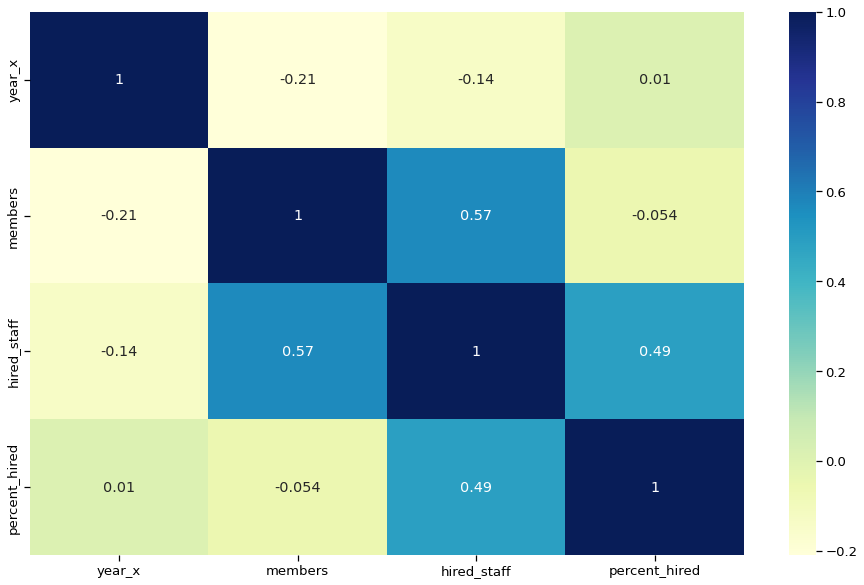

In [ ]:
#Checking for corelation
plt.figure(figsize = (16, 10))
sns.heatmap(G3.corr(), annot = True, cmap="YlGnBu")
plt.show()

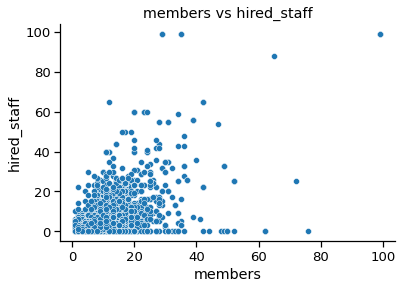

In [ ]:
#Need that in easier version for my understanding
sns.set_context("notebook", font_scale=1.2)
ax = sns.scatterplot(data = G3,
                x = 'members', 
                y = 'hired_staff')
ax.set(title = 'members vs hired_staff', ylabel = 'hired_staff', xlabel='members')
sns.despine()

glue("correlation_fig", ax, display=False)

There is not obvious line that could be drawn. Based on this chart. My predictor is members my outcome should be percent_hired. 

In [ ]:
#provided variables for training set
X = G3.drop('percent_hired', axis=1)
y = G3['percent_hired']

#splitting X and y into training and testing set 80:20 ratio it to 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

Evaluation of test via comparison.

In [ ]:
regression_model.score(X_test, y_test)

0.4206885569102208

Model explain 42%

In [ ]:
#Fitting model to the data
regression_model.fit(X_train, y_train)

#make predictions
y_pred = regression_model.predict(X_test)

print("Predictions: {}, Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [48.90641273 71.55177578], Values: [40. 73.]


Looks like the best way of suceeding the mission is to hire 40 or 70 percent of staff.


Trying to use KNeighborsClassifier to see if I am getting better results

In [ ]:
#Creating arrays for the features and target variable
y = G3["percent_hired"].values
X = G3[["members"]].values

knn = KNeighborsClassifier(n_neighbors=5)

#Fiting the classifier tot he data
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
X_new = np.array(G3['percent_hired']).reshape(-1, 1)

#predicting the labels for the X_new
y_pred = knn.predict(X_new)

#Priniting predictions for X_new
print("Predictions: {}".format(y_pred))

Predictions: [100.   0. 100. ...   0.   0.   0.]


splitting data and fitting classifier. Checking accuracy for test data.

In [ ]:
X = G3.drop("percent_hired", axis=1).values
y = G3["percent_hired"].values

#spliting data into training and test set with ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.7435315478892419


This indicate that KNeighborsClassifier is more efficient model then regression for my case.

In [ ]:
# Create neighbors 
neighbors = np.arange(1, 10) 
train_accuracies = {} 
test_accuracies = {} 

for neighbor in neighbors: 
# Set up a KNN Classifier 
	knn = KNeighborsClassifier(n_neighbors=neighbor) 

# Fit the model 
	knn.fit(X_train, y_train) 

# Compute accuracy 
	train_accuracies[neighbor] = knn.score(X_train, y_train) 
	test_accuracies[neighbor] = knn.score(X_test, y_test) 

print(neighbors, '\n', train_accuracies, '\n', test_accuracies) 

[1 2 3 4 5 6 7 8 9] 
 {1: 1.0, 2: 0.9222474460839954, 3: 0.892622020431328, 4: 0.861066969353008, 5: 0.8402951191827469, 6: 0.8195232690124858, 7: 0.8036322360953462, 8: 0.789216799091941, 9: 0.7743473325766175} 
 {1: 0.8551974580118021, 2: 0.799364502950522, 3: 0.7721289151157512, 4: 0.7607807535179301, 5: 0.7435315478892419, 6: 0.7276441216522923, 7: 0.7135724012709941, 8: 0.7035860190649115, 9: 0.6976849750340445}


Training accuracy decreases as the number of neighbors initially gets larger. These scores would be much easier to interpret in a line plot.

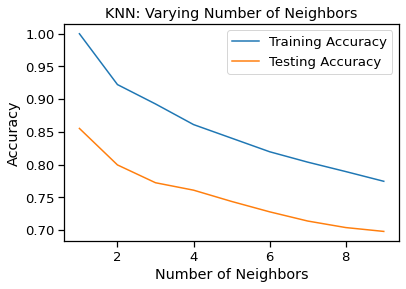

In [ ]:
#title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

I have to stop here due to time limitation I have for this project.

##Results
Goal 1. Problem with currently used data-set is that most of the features representing nominal data. After exploring data on this paper it looks like goal 1 need to be skipped as there is not enough data to support this comparison. This is very clear when we see how many record are in splited dataframe for before 1910 period and from the pie chart 


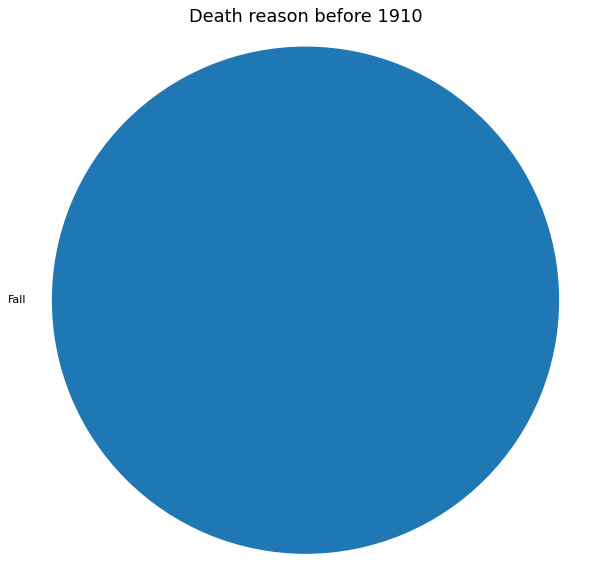



To get goal 1 accomplished it would be much better to analyze climbing data from another part of the world where there is more observations. Unfortunately observations made in pre-computerized years would be spread across various personal diaries so it would be very hard to group it.
Goal 2. Based on analisys when we tried to perform Chi-square analisis. Results were giving us very high numbers that did not tell us much about diference. 
Power_divergenceResult(statistic=240.3846153846154, pvalue=3.242219985667723e-54)
Power_divergenceResult(statistic=9788.692579505301, pvalue=0.0)
When we used library pingouin to do that for us we got few errors like ‘Low count on observed frequencies’ which was displayed for each set of data. There is a difinitally room for improvement on this dataset to get those results without errors. Unfortunatelly Pearson results indicate that there is no difference at all as results are exactly the same.
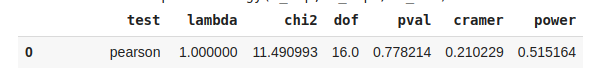
Fortunatelly by looking at graphs falls per members brought idea of comparison between percentage. 
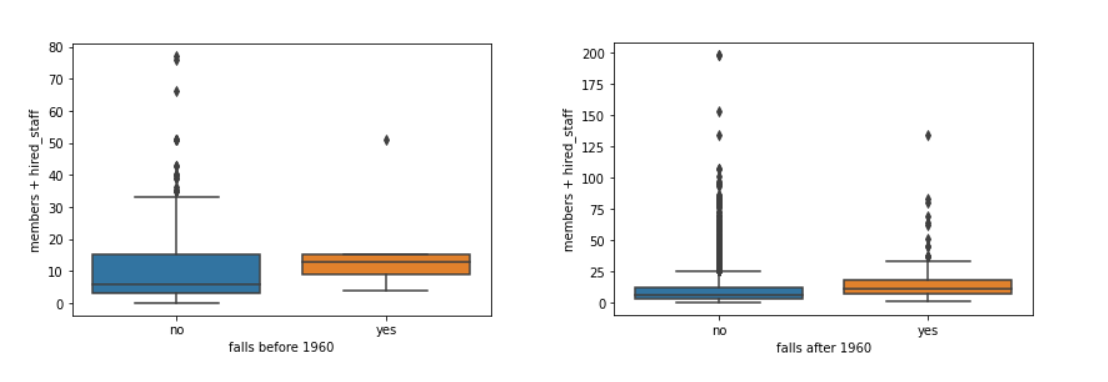

 Graphs from both periods shows that death reason has changed sligthly. But this is indicating more at apparent effect then significante difference. 

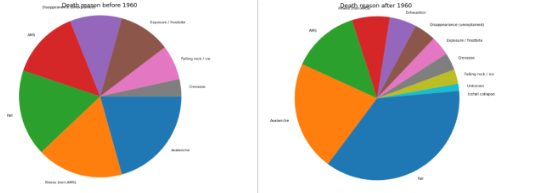


Conclusion from above results shows that development of harness and dynamic rope made impact on safety of 0.01% which is not as much as we would expect.



####*Things that could be improved but due to time restrain were not.
    1.  All dataset could be merged based on column Peak_id.
    2.  To visualise Pie charts percent could be added
    3.  Peaks_name could be replaced by numerical values
    4.  Result for death cause is linked to person, removing person_id along with death cause resulting in producing as fall. 


###Goal 3. Whats the percentage of hired_staff that need to be hired for expedition to be successful?


To get those results I used linear regression and based on scatterplot and scatter matrix there was no obvious line that could be drawn. However heatmap showed clear corelation between members and hired staff.

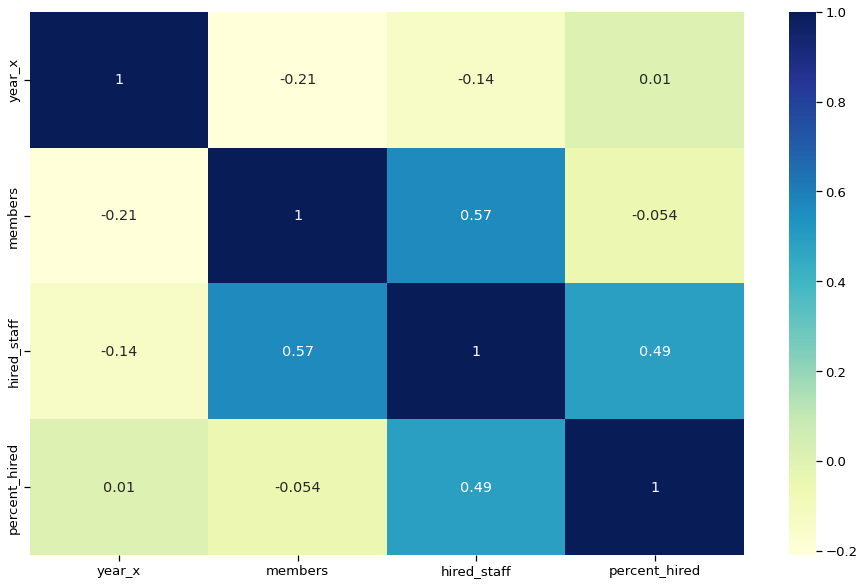

Decided to split my set for 80:20 ratio and got 42% as accurancy. Fitting model to the data provided me with answer: Predictions: [48.90641273 71.55177578], Values: [40. 73.]

This conclude in answer that the best way to succed the mission is to hire around 50 or 70 percent of staff.

##Insights
####Goal 1.

 - There is not enough observations to provide definite answer if steel carabiner made any difference on climbing safety

####Goal 2.
 - Death due to fall is actually extreme as climbers are falling on route atttempt basis. Not all falls are dangerous. In dataset fall is listed only as a reason for death but there is no count how many time climbers has fall before they die. One of the reason to die due to fall is not due to break of the rope but most often due to bad protection placing in the rock. As in Nepal we are dealing with Ice climbing it could be due to loose ice.
  - Hired staff column and count were skipped, therefore results can be improved.
  - Dispite safety new types of rope and harness made contribution to increase popularity of the sport. I assume there are more people surviving those expeditions and can share theres stories across the globe.

####Goal 3.
 - Regression said 40 or 70 percent I belive this can be decided based on climbers experience. Historically when the nations were desiring to be first that reached the top, expeditions members had different experience, different level of climbing skills as the selection rules for those were not that obvious. That is why I am pretty happy with the result I got. Even with model accurancy 42%.




###References



Dataset: https://www.kaggle.com/datasets/majunbajun/himalayan-climbing-expeditions

Convert nominal to numerical values: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

Generating more samples: https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

Comparing: https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf

Scrapping webpage url: https://quotes.toscrape.com

Hypothesis: https://corporatefinanceinstitute.com/resources/data-science/hypothesis-testing/

Chi-squered: https://www.ling.upenn.edu/~clight/chisquared.htm

Penguin - https://cmdlinetips.com/2020/06/principal-component-analysis-with-penguins-data-in-python/

Book - https://ethanweed.github.io/pythonbook

Supervised learning - https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/